# Homework 1
This homework consists of 2 parts:
* Numpy (5 points)
* Matplotlib (5 points)


The score for each task is described in the comments before the task.

The task is performed independently, otherwise all those involved will receive 0 points :) If you have found a solution to any of the tasks (or part of it) in an open source, you must specify a link to this source in a separate block at the end of your work. Otherwise, **the work will also be rated at 0 points**.

## Part 1. Numpy
It is forbidden to use **while**, **for**, **if** in this part. All operations must be performed in numpy calculation. Recall that using, for example, max instead of np.max is also a suboptimal step. The solution will be counted if it satisfies the conditions above and passes asserts.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn

### Task 1 (1 point)

In [4]:
def max_after_zero(x: np.array) -> int:   
    preceded_by_zero = x[:-1] == 0
    followed_by_zero = x[1:][preceded_by_zero]
    
    """
    if len(followed_by_zero) <= 0:
        raise ValueError("No elements are preceded by zero")
    """
    
    return np.max(followed_by_zero)

In [5]:
assert max_after_zero(np.array([0, 1, 2, 0, 6, 0, 10, 0])) == 10
assert max_after_zero(np.array([8, 1, 2, 0, 4, 0, 5])) == 5
assert max_after_zero(np.array([-8, -1, -2, 0, -4, 0, -5])) == -4
print("OK")

OK


### Task 2 (1 point)

In [6]:
"""
description: makes up a block matrix of four
blocks, where each block is a given matrix
"""
def block_matrix(block: np.array) -> np.array:
    return np.vstack([np.hstack([block, block]), np.hstack([block, block])])

In [7]:
block = np.array([[1, 3, 3], [7, 0, 0]])

assert np.allclose(
    block_matrix(block),
    np.array([[1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0],
              [1, 3, 3, 1, 3, 3],
              [7, 0, 0, 7, 0, 0]])
)
print("OK")

OK


### Task 3 (1 point)

In [8]:
"""
description: calculates the product of all
nonzero diagonal elements of a square matrix
"""
def diag_prod(matrix: np.array) -> int:
    diag = np.diag(matrix)
    result = np.prod(diag[diag != 0])
    return result

In [9]:
matrix = np.array([[0, 1, 2, 3],
                   [4, 5, 6, 7],
                   [8, 9, 10, 11],
                   [12, 13, 14, 15]])

assert diag_prod(matrix) == 750
print("OK")

AttributeError: module 'numpy' has no attribute 'matrix'

### Task 4 (1 points)

In [16]:
"""
description: this class implements StandardScaler from the sklearn library:
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html
As input, the fit method accepts a matrix where the features are arranged in
columns, the fit method must remember mean (u) and standard deviation (s) for each of the features,
and the transform must normalize the matrix with the pre-calculated mean and standard deviation.
The transformation : z = (x - u) / s, where x - initial feature value
"""
import numpy as np

class StandardScaler:
    def __init__(self):
        self.mean = None  
        self.scale = None  

    def fit(self, X: np.array):
        # calculate and store the mean and standard deviation 
        # 2D, rows — samples, columns — features

        self.mean = np.mean(X, axis=0)
        self.scale = np.std(X, axis=0, ddof=0) 

    def transform(self, X: np.array) -> np.array:
        return (X - self.mean) / self.scale


In [17]:
matrix = np.array([[1, 4, 4200], [0, 10, 5000], [1, 2, 1000]])
scaler = StandardScaler()

scaler.fit(matrix)

assert np.allclose(
    scaler.transform(matrix),
    np.array([[ 0.7071, -0.39223,  0.46291],
              [-1.4142,  1.37281,  0.92582],
              [ 0.7071, -0.98058, -1.38873]])
)
print("OK")

OK


### Task 5 (1 point)

In [19]:
"""
description: calculates the antiderivative polynomial (take 42 as a constant)
for example, an array of coefficients [6, 0, 1] corresponds to 6x^2 + 1
"""
def antiderivative(coefs: np.array) -> np.array:
    anti_coefs = np.array([coefs[i] / (len(coefs) - i) for i in range(len(coefs))])
    return np.append(anti_coefs, 42)


In [20]:
coefs = np.array([4, 6, 0, 1])

assert np.allclose(
    antiderivative(coefs),
    np.array([1., 2., 0., 1., 42.])
)
print("OK")

OK


In [21]:
coefs = np.array([1, 7, -12, 21, -6])

assert np.allclose(
    antiderivative(coefs),
    np.array([ 0.2, 1.75, -4., 10.5, -6., 42.])
)
print("OK")

OK


## Part 2. Matplotlib

Graphs should be readable without having to look into the code:
*   Graph should have a title
*   Subgraphs should have  titles
*   Axes should be labeled
*   Labels should not overlap
*   Font should be readable
*   The colors should be easily distinguishable

### Task 1 (2.5 points)
Generate a Gaussian vector of dimension 2 from 100 points (choose $\mu$ and $\sigma$ on your choice).

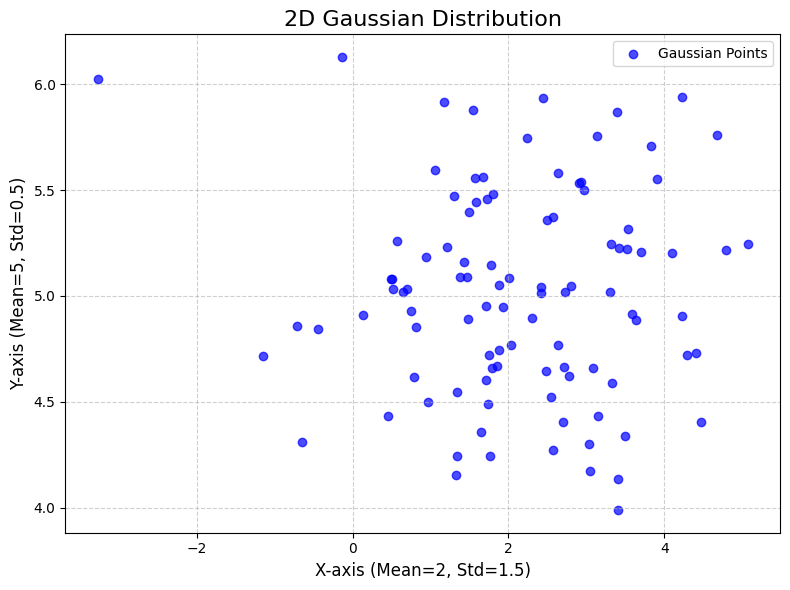

In [25]:
import numpy as np
import matplotlib.pyplot as plt

mu = [2, 5] 
sigma = [1.5, 0.5] 
points = 100  

x = np.random.normal(mu[0], sigma[0], points)
y = np.random.normal(mu[1], sigma[1], points)

fig, ax = plt.subplots(figsize=(8, 6))

scatter = ax.scatter(x, y, c='blue', alpha=0.7, label="Gaussian Points")

ax.set_title("2D Gaussian Distribution", fontsize=16)
ax.set_xlabel("X-axis (Mean=2, Std=1.5)", fontsize=12)
ax.set_ylabel("Y-axis (Mean=5, Std=0.5)", fontsize=12)

ax.legend(fontsize=10)
ax.grid(True, linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

Check [the three sigma rule](https://en.wikipedia.org/wiki/68-95-99.7_rule): 99.7% of the values of normal distribution $\in [\mu - 3\sigma; \mu + 3\sigma]$.

Let's visually check this rule for generated 2D data. Draw:

*   The generated data;
*   Point $\mu$ in a separate color;
*   A circle centered in $\mu$ with a radius such that 0.99 of all points fall there;
*   A circle with a radius of 3 sigma;

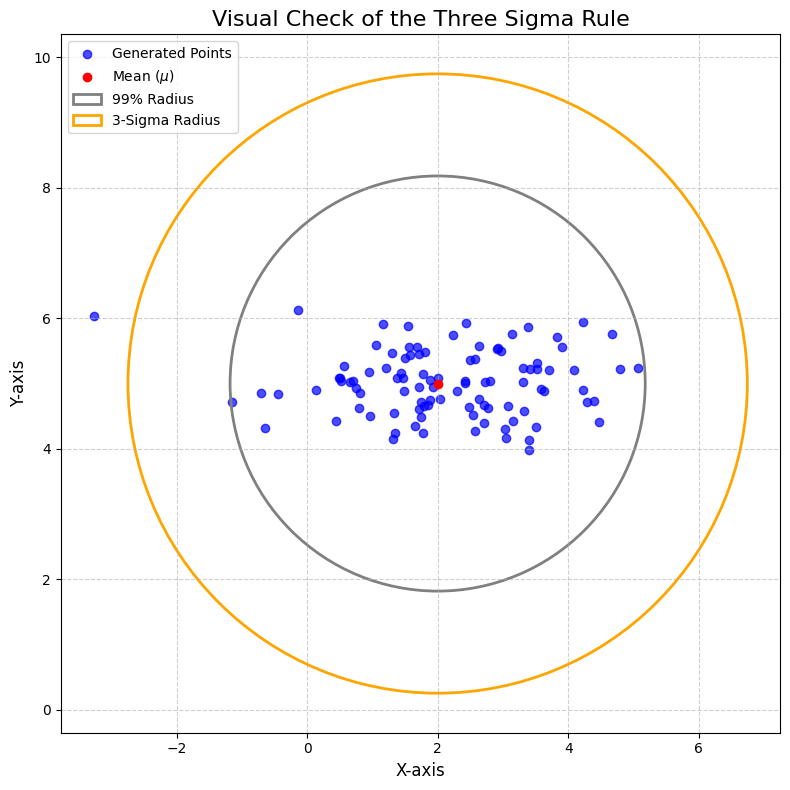

In [28]:
import matplotlib.patches as patches

center = mu
distances = np.sqrt((x - center[0])**2 + (y - center[1])**2)

radius_99 = np.percentile(distances, 99)
radius_3sigma = 3 * np.sqrt(sigma[0]**2 + sigma[1]**2)

fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(x, y, c='blue', alpha=0.7, label="Generated Points")
ax.scatter(center[0], center[1], c='red', label="Mean ($\\mu$)", zorder=5)  # mark the mean

circle_99 = patches.Circle(center, radius_99, edgecolor='gray', fill=False, linewidth=2, label="99% Radius")
ax.add_patch(circle_99)

circle_3sigma = patches.Circle(center, radius_3sigma, edgecolor='orange', fill=False, linewidth=2, label="3-Sigma Radius")
ax.add_patch(circle_3sigma)

ax.grid(True, linestyle='--', alpha=0.6)

ax.set_title("Visual Check of the Three Sigma Rule", fontsize=16)
ax.set_xlabel("X-axis", fontsize=12)
ax.set_ylabel("Y-axis", fontsize=12)
ax.legend(fontsize=10)

ax.set_aspect('equal', adjustable='datalim')

plt.tight_layout()
plt.show()


Possible reference picture:

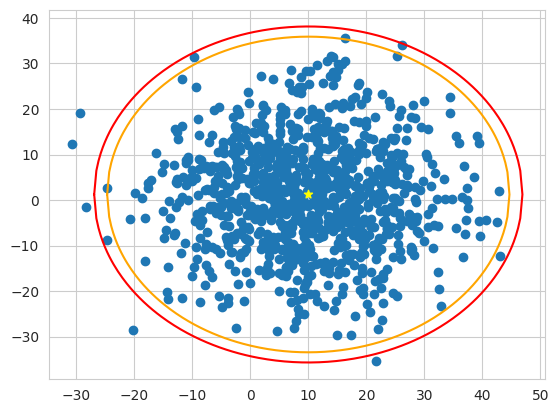

Draw histograms with 10 buckets for each dimension.

**Hint** use `plt.hist2d`

In [1]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

ax1.hist(x, bins=10, color='blue', edgecolor='black')
ax1.set_title("Histogram of X-axis", fontsize=16)
ax1.set_xlabel("X-axis", fontsize=12)
ax1.set_ylabel("Frequency", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.6)  

ax2.hist(y, bins=10, color='green', edgecolor='black')
ax2.set_title("Histogram of Y-axis", fontsize=16)
ax2.set_xlabel("Y-axis", fontsize=12)
ax2.set_ylabel("Frequency", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)  

plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined

### Task 2 (2.5 points)

Upload the dataset  [fischer's irises](https://ru.wikipedia.org/wiki/Ирисы_Фишера).

In [34]:
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris(as_frame=True)
X, y = iris.data, iris.target
X.sample(3)

ModuleNotFoundError: No module named 'sklearn'

Compute correlation between features

In [35]:
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris(as_frame=True)
X = iris.data

# Compute the correlation matrix
correlation_matrix = X.corr()

# Display the correlation matrix
print(correlation_matrix)

ModuleNotFoundError: No module named 'sklearn'

To make investigating correlation more convenient build a **heatmap** using matplotlib.

Rows and columns should be signed with feature names.  The positive correlation should be displayed in green, the reverse in red, and the absence of correlation in white. Make the plot big enough.

**Hint:** use `plt.xticks`, `plt.yticks`, `plt.imshow`, `plt.colorbar`

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris(as_frame=True)
X = iris.data

# Compute the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap
plt.figure(figsize=(8, 6))  # Set the size of the plot
plt.imshow(correlation_matrix, cmap='RdYlGn', interpolation='none')  # Use Red-Yellow-Green colormap
plt.colorbar()  # Add colorbar

# Set ticks to show feature names
plt.xticks(ticks=range(len(X.columns)), labels=X.columns, rotation=45)
plt.yticks(ticks=range(len(X.columns)), labels=X.columns)

# Add title
plt.title('Feature Correlation Heatmap')

# Display the heatmap
plt.show()

ModuleNotFoundError: No module named 'seaborn'

Build the same heatmap using seaborn.heatmap

In [36]:
import seaborn as sns
from sklearn.datasets import load_iris

# Load the Iris dataset
iris = load_iris(as_frame=True)
X = iris.data

# Compute the correlation matrix
correlation_matrix = X.corr()

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))  # Set the size of the plot
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlGn', center=0, vmin=-1, vmax=1, 
            xticklabels=X.columns, yticklabels=X.columns)

# Add title
plt.title('Feature Correlation Heatmap')

# Display the heatmap
plt.show()


ModuleNotFoundError: No module named 'seaborn'